## Mô hình nhận diện số viết tay

In [643]:
import numpy as np

def sigmoid(z):  
    return 1 / (1 + np.exp(-z))  

def logistic_regression(X, y, eta, num_epochs=1000):  
    num_samples, num_features = X.shape  
    w = np.zeros(num_features)  
    b = 0  
    count = 0
    check_w_after = 1
    
    # Stochastic Gradient Descent
    for epoch in range(num_epochs):  
        # Shuffle dữ liệu mỗi epoch  
        indices = np.arange(num_samples)
        np.random.shuffle(indices)

        for i in indices:  
            xi = X[i, :].reshape(num_features, 1)  
            yi = y[i]  
            zi = sigmoid(np.dot(w.T, xi) + b)   
            
            w_new = w + eta * (yi - zi) * xi.flatten()  
            b += eta * (yi - zi)  
            
            count += 1
            if count % check_w_after == 0:  
                if np.linalg.norm(w_new - w) < 1e-3:
                     return w_new, b
                w = w_new
            
    return w, b
    
def predict(X, w, b):  
    y_predicted = sigmoid(np.dot(X, w) + b)  
    return (y_predicted >= 0.5).astype(int)   

def predict_probabilities(X, weights, biases):  
    probas = []  
    for w, b in zip(weights, biases):  
        prob = sigmoid(np.dot(X, w) + b)  
        probas.append(prob)  
    return np.array(probas).T


In [644]:
from sklearn.datasets import load_digits

# Tải dữ liệu  
digits = load_digits()  
X = digits.data  
y = digits.target  

In [645]:
from sklearn.model_selection import train_test_split  

# Chia dữ liệu thành tập huấn luyện và kiểm tra  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

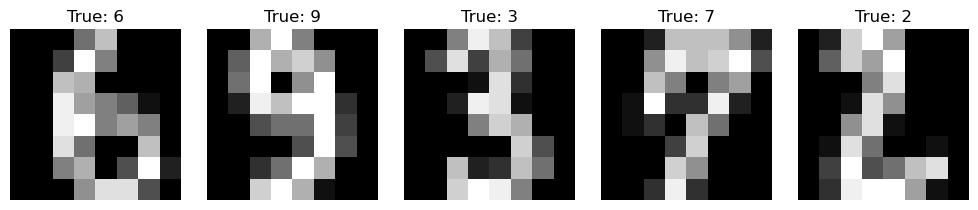

In [646]:
# Hàm hiển thị các hình ảnh từ X_test  
def display_digits(X, y, num_images=5):  
    plt.figure(figsize=(10, 4))  
    for i in range(num_images):  
        plt.subplot(2, 5, i + 1)  
        plt.imshow(X[i].reshape(8, 8), cmap='gray', interpolation='none')  
        plt.title(f'True: {y[i]}')  
        plt.axis('off')  # Ẩn trục  
    plt.tight_layout()  
    plt.show()

display_digits(X_test, y_test)

In [676]:
from sklearn.preprocessing import StandardScaler 
# Chuẩn hóa dữ liệu  
scaler = StandardScaler()  
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)  

# Huấn luyện mô hình cho mỗi chữ số từ 0 đến 9  
num_classes = 10  
weights = []  
biases = [] 
eta = .01 # điều chỉnh tỉ lệ học để huấn luyện tốt hơn

for digit in range(num_classes):  
    y_binary = (y_train == digit).astype(int)  # Nhãn nhị phân cho mỗi chữ số  
    w, b = logistic_regression(X_train, y_binary, eta, num_epochs=1000)  
    weights.append(w)  
    biases.append(b)  

In [678]:
probabilities = predict_probabilities(X_test, weights, biases)  

# Đánh giá độ chính xác cho từng chữ số  
predicted_classes = np.argmax(probabilities, axis=1)  
accuracy = np.mean(predicted_classes == y_test)  
print(f'Accuracy: {accuracy * 100:.2f}%')  

# Ví dụ về cách lấy xác suất cho một mẫu cụ thể  
instance_index = 1  # Chỉ số mẫu muốn kiểm tra  
print(f'Probabilities for instance {instance_index}: {probabilities[instance_index]}') 

Accuracy: 94.44%
Probabilities for instance 1: [0.18029815 0.05696584 0.14432676 0.1897701  0.12919687 0.35300546
 0.02094202 0.1100379  0.13094954 0.56096663]


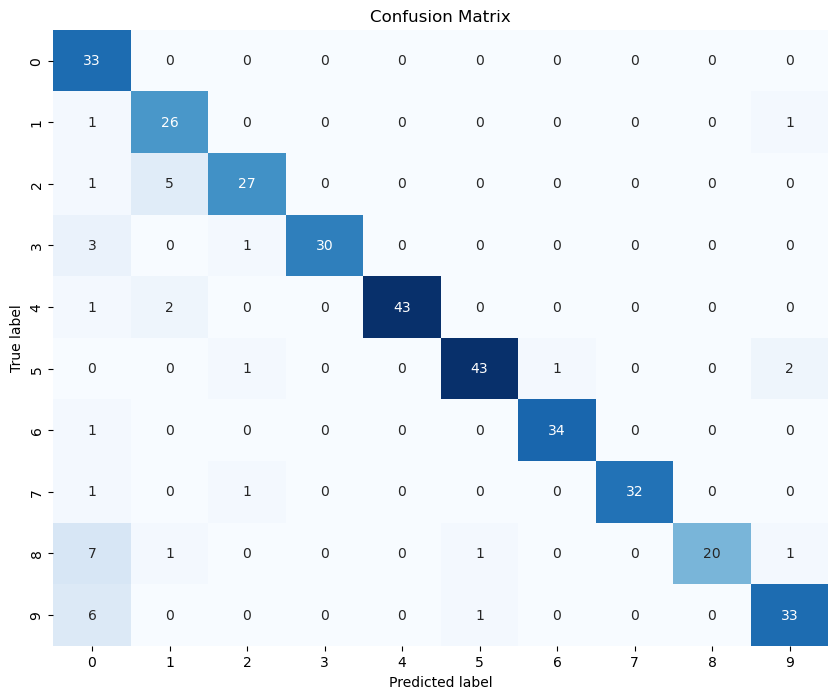

In [690]:
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Dự đoán các nhãn cho tập kiểm tra  
y_pred = np.array([np.argmax([predict(X_test[i].reshape(1, -1), w, b) for w, b in zip(weights, biases)]) for i in range(X_test.shape[0])])  

# Tính toán và hiển thị ma trận nhầm lẫn  
cm = confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(10, 8))  
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,  
            xticklabels=np.arange(10), yticklabels=np.arange(10))  
plt.xlabel('Predicted label')  
plt.ylabel('True label')  
plt.title('Confusion Matrix')  
plt.show()

import pickle  

# Lưu weights và biases vào tệp tin  
with open('logistic_regression_model.pkl', 'wb') as f:  
    pickle.dump((weights, biases), f)  
print("Mô hình đã được lưu vào 'logistic_regression_model.pkl'")

In [684]:
# Nạp weights và biases từ tệp tin  
with open('logistic_regression_model.pkl', 'rb') as f:  
    weights, biases = pickle.load(f)  

print("Mô hình đã được nạp thành công.")

Mô hình đã được nạp thành công.


In [686]:
# Sử dụng lại để dự đoán  
probabilities_loaded = predict_probabilities(X_test, weights, biases)  
predicted_classes_loaded = np.argmax(probabilities_loaded, axis=1)  
accuracy_loaded = np.mean(predicted_classes_loaded == y_test)  
print(f'Accuracy after loading the model: {accuracy_loaded * 100:.2f}%')

Accuracy after loading the model: 94.44%
